In [360]:
import  pandas  as pd
import  numpy  as np
import  matplotlib.pyplot  as plt

# Task 1

In [361]:
cen = pd.read_csv('census (1).csv')
cen

,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
1,2000,Florida,22800.0,20,Female,White,Never married/single,13000.0
2,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
3,2000,Florida,23000.0,6,Female,White,Never married/single,NaN
4,2000,Florida,48000.0,55,Male,White,Married/spouse present,36000.0
5,2000,Florida,74000.0,43,Female,White,Married/spouse present,27000.0
6,2000,Florida,23000.0,60,Female,White,Married/spouse present,11800.0
7,2000,Florida,74000.0,47,Female,White,Married/spouse present,48000.0
8,2000,Florida,60000.0,54,Female,Black,Married/spouse present,40000.0
9,2000,Florida,14600.0,58,Female,White,Widowed,14600.0


### Initial Observations

The columns of the data set are census year, state, total family income, age, sex, race (general), marital status, and total personal income. Of these, census year, state, sex, and race marital status are categorical while total family income, age, and total personal income are numerical. In total, there are 500 different entries, which is a relatively small data set. All data entries are from the year 2000. 

Some issues that might arise include the consistency of data. For example, it appears that not all states are represented. The ones that are represented do not appear in the same quantity, which will skew the data. The sex distribution appears to be fairly equal, which is good for analysis purposes. Another issues might arise because the prominent races that are represented are black and white, which leaves out a large percentage of the popultion to be considered. In terms of age, the spread looks like a good variety of inputs, however, certain ages will skew the data for income because younger people don't generally work and older people are generally retired. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cb8a8d0>,
      dtype=object)

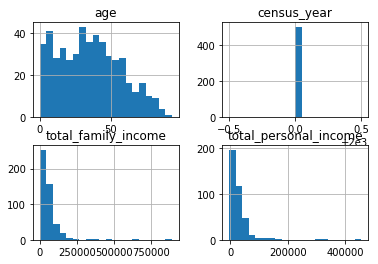

In [362]:
cen.hist(bins = 20)

The numerical data of total family income and personal income appear to have some outliers. This may impact analysis and may need to be addressed. The decreased amount of participants with age has a logical reasoning for being that way, although even the younger participants vary in number.

In [363]:
cen.describe()

,census_year,total_family_income,age,total_personal_income
count,500.0,485.000000,500.000000,392.000000
mean,2000.0,57410.981443,35.298000,29081.724490
std,0.0,70732.055954,21.812124,46089.291918
min,2000.0,0.000000,0.000000,-4400.000000
25%,2000.0,21500.000000,17.000000,5900.000000
50%,2000.0,43000.000000,35.000000,17750.000000
75%,2000.0,70700.000000,51.000000,37000.000000
max,2000.0,892050.000000,93.000000,456000.000000


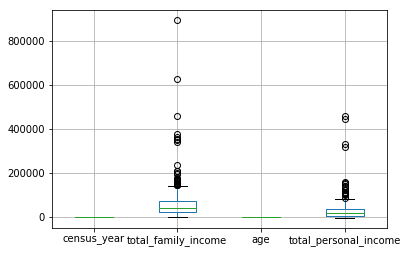

In [364]:
cen.boxplot()

As noted previously, both income variables have a high percentage of outliers. While dropping outliers will not always get rid of all of them, it will help to create a better picture of the data at hand.

# Task 2

### Part (a)

Does California have a higher median family income than Texas?

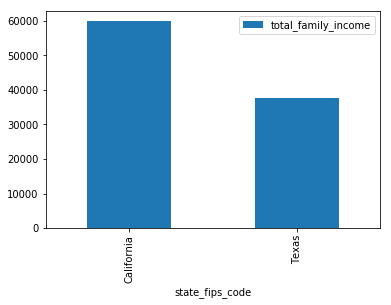

In [365]:
cen_a = cen[(cen['state_fips_code']=='California')|(cen['state_fips_code']=='Texas')]

cen_avg_family_income_state = cen_a [['state_fips_code','total_family_income']].groupby('state_fips_code').median()

cen_avg_family_income_state.plot(kind = 'bar')

Upon first observations of the graph, it appears that California has a higher median family income than Texas. Further analysis of the dataframe will be done to assess fairness, outliers, and overall accuracy of the data. 

In [366]:
cen_a = cen_a.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d671750>,
      dtype=object)

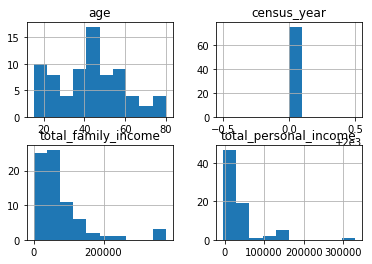

In [367]:
cen_a.hist()

The curve for total personal income is obscure, which might be impacted by the data points collected for age, which do not fairly represent a population. This is because the age has a great peak at around 40 years and dips around 30 years and 70 years, which is abnormal.

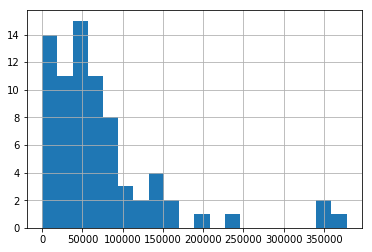

In [368]:
cen_a['total_family_income'].hist(bins = 20)

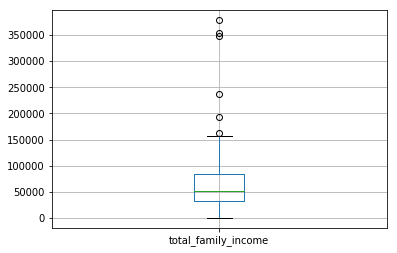

In [369]:
cen_a.boxplot(column = "total_family_income")

In [370]:
cen_a['total_family_income'].describe()

count        75.000000
mean      72740.933333
std       75268.559751
min           0.000000
25%       32000.000000
50%       52000.000000
75%       83850.000000
max      378200.000000
Name: total_family_income, dtype: float64

Total family income, the variable put into question in the problem, doesn't appear to have many outliers. This is good, however, the dataframe can still be made into a more accurate representation of the situation at hand through removing more outliers. 

In [371]:
cen_a.median()

census_year               2000.0
total_family_income      52000.0
age                         45.0
total_personal_income    17500.0
dtype: float64

In [372]:
print cen_a.skew()

census_year              0.000000
total_family_income      2.469128
age                      0.216653
total_personal_income    3.210702
dtype: float64


In [373]:
print cen_a.var()

census_year              0.000000e+00
total_family_income      5.665356e+09
age                      2.801755e+02
total_personal_income    2.762375e+09
dtype: float64


For California and Texas, it is evident in the histogram and box plot that there are outliers for the values of total family income and personal income. While these outliers are valid data points, they skew the analysis at hand. These outliers have resulted in a high standard deviation. Futher work will now be done to remove the outliers. While age has a small skew, it has a high variance and removing the outliers will help to make the analysis more accureate. Only total family income outliers and age outliers will be addressed as personal income outliers will correspond with total family income outliers. The IQR method will both be utilized to increase accuracy of conclusions. 

Another note, there are 75 values for total family income between California and Texas. While the original sample size of 500 is still relatively small, this sample size is even smaller, which will impact the accuracy of the conclusions. 

In [374]:
texas = cen_a[(cen_a['state_fips_code']=='Texas')]
texas_family = texas['total_family_income']
texas_family

232     45400.0
233     50030.0
234     44000.0
235     32000.0
236     32000.0
237      4600.0
238     56000.0
239    348000.0
240     27000.0
243    150500.0
244    237000.0
246      9300.0
248     40050.0
249     19200.0
250     37500.0
252    141900.0
253     45800.0
255     38000.0
258     51000.0
259     55000.0
260     59300.0
261     58000.0
263     13000.0
265     63600.0
266         0.0
267     11300.0
Name: total_family_income, dtype: float64

In [375]:
california = cen_a[(cen_a['state_fips_code']=='California')]
california_family = california['total_family_income']
california_family

90      52000.0
91     156000.0
92      59000.0
93      37500.0
96      79000.0
97     134000.0
98      77000.0
99     130000.0
100     10000.0
101     12000.0
102    101800.0
104     43900.0
105    113710.0
106     82300.0
108     80300.0
109     36100.0
110     60980.0
111     58760.0
112     35000.0
113      7400.0
114    141000.0
115     10200.0
117     85400.0
118     77700.0
119     13500.0
120     24800.0
121     87100.0
122     47300.0
123     34850.0
124     62000.0
125     90000.0
126     18000.0
128     57190.0
130      9700.0
131    353100.0
133     48000.0
134     65000.0
135    193000.0
136     60000.0
137    162600.0
138     41500.0
139     14900.0
140    103000.0
141     64800.0
142     44000.0
146    102000.0
148         0.0
149     30500.0
151    378200.0
Name: total_family_income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12dca6b90>,
      dtype=object)

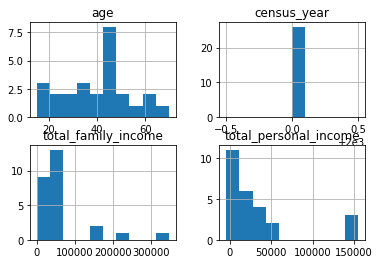

In [376]:
texas.hist()

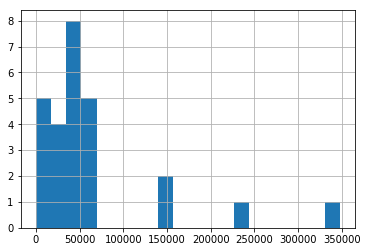

In [377]:
texas_family.hist(bins = 20)

The distribution for Texas's total family incomes is abnormal and does not fit an exponential curve well. While removing outliers will help with this, it is possible that the unequal representation for age has impacted the data points for total family income. As seen above, there's a massive peak around age 40 that will severly skew the rest of the variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12de54f90>,
      dtype=object)

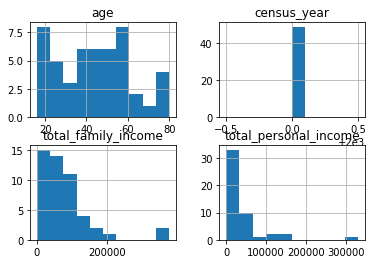

In [378]:
california.hist()

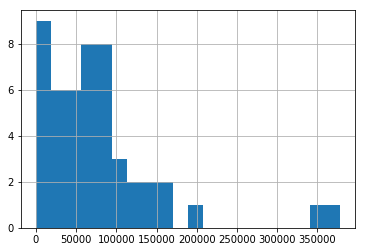

In [379]:
california_family.hist(bins = 20)

The distribution for California's total family incomes is a bit more normal. This could be explained by the representation of age groups. While there is still a dip around age 30 and peak around age 80, it is not as severe as the Texas dataframe. Additionally, if both Texas and California had equally skewed age represenations, this would not be as impactful as having skewed ages that are totally different.

#### Removing outliers in total family income for Texas via the IQR method

In [380]:
family_income_texas = texas['total_family_income']
family_income_texas_median = family_income_texas.median()
family_income_texas_iqr = family_income_texas.quantile(0.75) - family_income_texas.quantile(0.25)

print len(texas[family_income_texas > family_income_texas_median+1.5*family_income_texas_iqr])
print len(texas[family_income_texas < family_income_texas_median-1.5*family_income_texas_iqr])

texas_median_outlier_drop = texas.drop(
    texas.index[
        (family_income_texas> family_income_texas_median+1.5*family_income_texas_iqr) | (family_income_texas<family_income_texas_median-1.5*family_income_texas_iqr)
    ]
)

print family_income_texas_median - 1.5*family_income_texas_iqr
print family_income_texas_median + 1.5*family_income_texas_iqr

texas_median_outlier_drop.head()

4
1
825.0
88575.0


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
232,2000,Texas,45400.0,64,Female,White,Married/spouse present,8000.0
233,2000,Texas,50030.0,46,Male,White,Married/spouse present,30030.0
234,2000,Texas,44000.0,35,Male,White,Married/spouse present,16000.0
235,2000,Texas,32000.0,27,Female,White,Divorced,0.0
236,2000,Texas,32000.0,45,Female,Black,Married/spouse present,10000.0


#### Removing outliers in age for Texas via the IQR method

In [381]:
age_texas = texas['age']
age_texas_median = age_texas.median()
age_texas_iqr = age_texas.quantile(0.75) - age_texas.quantile(0.25)

print len(texas[age_texas > age_texas_median+1.5*age_texas_iqr])
print len(texas[age_texas < age_texas_median-1.5*age_texas_iqr])

texas_median_outlier_drop_final = texas.drop(
    texas.index[
        (age_texas> age_texas_median+1.5*age_texas_iqr) | (age_texas<age_texas_median-1.5*age_texas_iqr)
    ]
)

print age_texas_median - 1.5*age_texas_iqr
print age_texas_median + 1.5*age_texas_iqr

texas_median_outlier_drop_final.head()

1
3
20.25
66.75


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
232,2000,Texas,45400.0,64,Female,White,Married/spouse present,8000.0
233,2000,Texas,50030.0,46,Male,White,Married/spouse present,30030.0
234,2000,Texas,44000.0,35,Male,White,Married/spouse present,16000.0
235,2000,Texas,32000.0,27,Female,White,Divorced,0.0
236,2000,Texas,32000.0,45,Female,Black,Married/spouse present,10000.0


#### Removing outliers for total family income in California via the IQR method

In [382]:
family_income_california = california['total_family_income']
family_income_california_median = family_income_california.median()
family_income_california_iqr = family_income_california.quantile(0.75) - family_income_california.quantile(0.25)

print len(california[family_income_california > family_income_california_median+1.5*family_income_california_iqr])
print len(california[family_income_california < family_income_california_median-1.5*family_income_california_iqr])

california_median_outlier_drop = california.drop(
    california.index[
        (family_income_california > family_income_california_median+1.5*family_income_california_iqr) | (family_income_california<family_income_california_median-1.5*family_income_california_iqr)
    ]
)

print family_income_california_median - 1.5*family_income_california_iqr
print family_income_california_median + 1.5*family_income_california_iqr

california_median_outlier_drop.head()

5
0
-22500.0
142500.0


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
90,2000,California,52000.0,40,Female,White,Married/spouse present,27000.0
92,2000,California,59000.0,80,Male,White,Married/spouse present,52100.0
93,2000,California,37500.0,46,Female,White,Married/spouse present,17500.0
96,2000,California,79000.0,26,Female,White,Never married/single,25000.0
97,2000,California,134000.0,58,Male,White,Married/spouse present,134000.0


#### Removing outliers in age for California via the IQR method

In [383]:
age_california = california['age']
age_california_median = age_california.median()
age_california_iqr = age_california.quantile(0.75) - age_california.quantile(0.25)

print len(california[age_california > age_california_median+1.5*age_california_iqr])
print len(california[age_california < age_california_median-1.5*age_california_iqr])

california_median_outlier_drop_final = california.drop(
    california.index[
        (age_california> age_california_median+1.5*age_california_iqr) | (age_california<age_california_median-1.5*age_california_iqr)
    ]
)

print age_california_median - 1.5*age_california_iqr
print age_california_median + 1.5*age_california_iqr

california_median_outlier_drop_final.head()

0
0
0.0
90.0


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
90,2000,California,52000.0,40,Female,White,Married/spouse present,27000.0
91,2000,California,156000.0,65,Female,White,Married/spouse present,10000.0
92,2000,California,59000.0,80,Male,White,Married/spouse present,52100.0
93,2000,California,37500.0,46,Female,White,Married/spouse present,17500.0
96,2000,California,79000.0,26,Female,White,Never married/single,25000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e305910>,
      dtype=object)

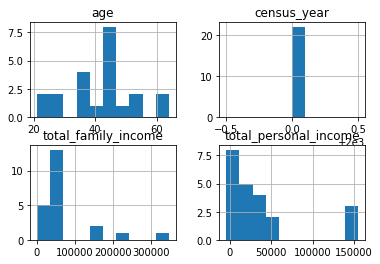

In [384]:
texas_median_outlier_drop_final.hist()

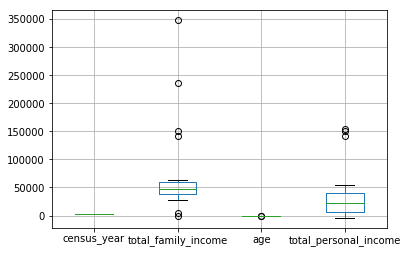

In [385]:
texas_median_outlier_drop_final.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e7e4450>,
      dtype=object)

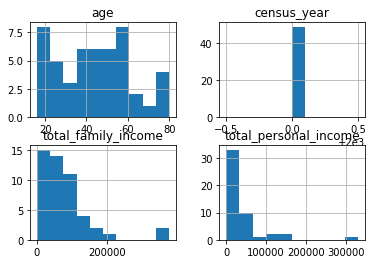

In [386]:
california_median_outlier_drop_final.hist()

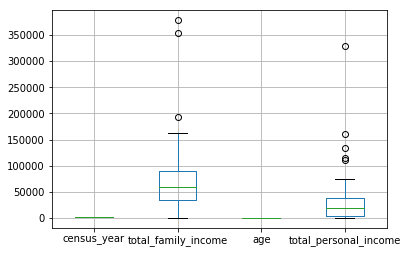

In [387]:
california_median_outlier_drop_final.boxplot()

It appears that removing outliers has substantially improved the normalness of the curves for total family income. This will help improve the accuracy of the analysis.

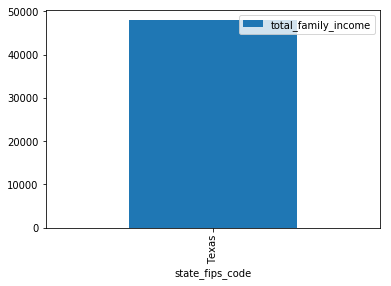

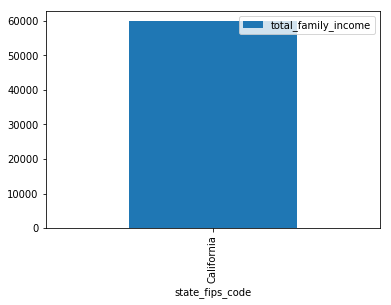

In [388]:
texas_median_drop_family_income_state = texas_median_outlier_drop_final [['state_fips_code','total_family_income']].groupby('state_fips_code').median()
texas_median_drop_family_income_state.plot(kind = 'bar')

california_median_drop_family_income_state = california_median_outlier_drop_final [['state_fips_code','total_family_income']].groupby('state_fips_code').median()
california_median_drop_family_income_state.plot(kind = 'bar')

After removing outliers, it remains evident that California has a substantially higher median family income than Texas, having around a 10000 dollar difference. 

### Part (b)

Is the proportion of families that earn less than 15,000 dollars greater than than the proportion of familes that make above 100,000 dollars?

In [389]:
cen_less_than = cen[cen['total_family_income']<=15000]
cen_less_than.describe()

,census_year,total_family_income,age,total_personal_income
count,91.0,91.000000,91.000000,70.000000
mean,2000.0,7668.131868,36.978022,9026.914286
std,0.0,5322.843207,25.739713,9832.561367
min,2000.0,0.000000,0.000000,0.000000
25%,2000.0,2100.000000,16.000000,1650.000000
50%,2000.0,9300.000000,32.000000,7210.000000
75%,2000.0,12500.000000,59.000000,12600.000000
max,2000.0,15000.000000,93.000000,51000.000000


In [390]:
cen_less_than = cen_less_than.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12eb5b910>,
      dtype=object)

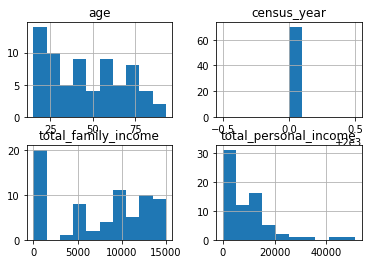

In [391]:
cen_less_than.hist()

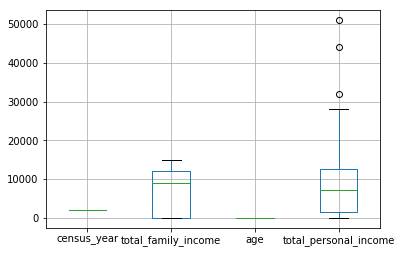

In [392]:
cen_less_than.boxplot()

In [393]:
cen_less_than.skew()

census_year              0.000000
total_family_income     -0.240641
age                      0.278321
total_personal_income    2.038707
dtype: float64

The distribution for age appears to be very erratic, although, the boxplot reveals that there are not substantial outliers. There do, however, appear to be outliers for total personal income and total family income. Due to how each variables are skewed, there will be a mean outlier drop done on personal income and family income. 

In [394]:
family_income = cen_less_than['total_family_income']
family_income_mean = family_income.mean()
family_income_mean = family_income.mean()
family_income_std = family_income.std()

cen_less_than_mean_outlier_drop = cen_less_than.drop(
    cen_less_than.index[
        (family_income> family_income_mean+5*family_income_std) | (family_income<family_income_mean-5*family_income_std)
    ]
)

print family_income_mean - 5*family_income_std
print family_income_mean + 5*family_income_std

cen_less_than_mean_outlier_drop.head()

-19700.067722
34416.6391506


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
2,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
9,2000,Florida,14600.0,58,Female,White,Widowed,14600.0
10,2000,Florida,0.0,33,Female,White,Never married/single,23000.0
27,2000,Florida,0.0,67,Male,Black,Widowed,8400.0


In [395]:
personal_income = cen_less_than_mean_outlier_drop['total_personal_income']
personal_income_mean = personal_income.mean()
personal_income_std = personal_income.std()

cen_less_than_mean_outlier_drop_final = cen_less_than_mean_outlier_drop.drop(
    cen_less_than_mean_outlier_drop.index[
        (personal_income > personal_income_mean+2.5*personal_income_std) | 
        (personal_income < personal_income_mean-2.5*personal_income_std)
    ]
)

print personal_income_mean - 2.5*personal_income_std
print personal_income_mean + 2.5*personal_income_std

cen_less_than_mean_outlier_drop_final.head()

-15554.4891318
33608.3177032


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
2,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
9,2000,Florida,14600.0,58,Female,White,Widowed,14600.0
10,2000,Florida,0.0,33,Female,White,Never married/single,23000.0
27,2000,Florida,0.0,67,Male,Black,Widowed,8400.0


In [396]:
cen_greater_than = cen[cen['total_family_income']>=100000]
cen_greater_than.describe()

,census_year,total_family_income,age,total_personal_income
count,63.0,63.000000,63.000000,50.00000
mean,2000.0,177975.142857,38.984127,89994.00000
std,0.0,133496.606108,20.320411,101835.82069
min,2000.0,100000.000000,4.000000,0.00000
25%,2000.0,113000.000000,21.000000,22000.00000
50%,2000.0,130000.000000,43.000000,59500.00000
75%,2000.0,168200.000000,54.500000,114000.00000
max,2000.0,892050.000000,74.000000,456000.00000


In [397]:
cen_greater_than = cen_greater_than.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f0ca050>,
      dtype=object)

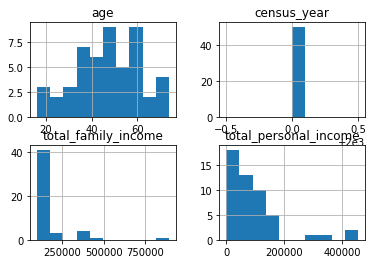

In [398]:
cen_greater_than.hist()

The majority of the people surveyed in this dataframe are middle aged. This corresponds to logical reasoning that people would be in the peak of the career and be making a higher income. However, there are still participants who have a low personal income and high family income, which could also logically occur. Overall, 

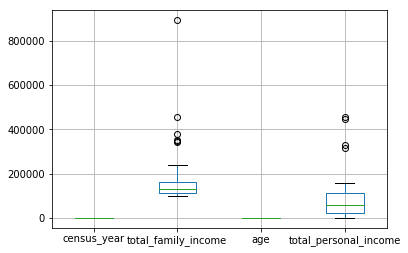

In [399]:
cen_greater_than.boxplot()

In [400]:
cen_greater_than.describe()

,census_year,total_family_income,age,total_personal_income
count,50.0,50.000000,50.000000,50.00000
mean,2000.0,173475.680000,46.920000,89994.00000
std,0.0,130923.481398,14.464369,101835.82069
min,2000.0,100000.000000,16.000000,0.00000
25%,2000.0,113125.000000,37.250000,22000.00000
50%,2000.0,130000.000000,45.500000,59500.00000
75%,2000.0,164400.000000,59.500000,114000.00000
max,2000.0,892050.000000,74.000000,456000.00000


The sample size is 50, a mere 10% of what the original dataframe contained. This will have to be kept in mind when considering the validity of the conclusion because a smaller sample size means a less accurate conclusion, generally. It appears total family income and personal income have the greatest outliers, which will be removed the same way as the previous data set for consistency and accuracy of analysis. 

In [401]:
family_income = cen_greater_than['total_family_income']
family_income_mean = family_income.mean()
family_income_mean = family_income.mean()
family_income_std = family_income.std()

cen_greater_than_mean_outlier_drop = cen_greater_than.drop(
    cen_greater_than.index[
        (family_income> family_income_mean+5*family_income_std) | (family_income<family_income_mean-5*family_income_std)
    ]
)

print family_income_mean - 5*family_income_std
print family_income_mean + 5*family_income_std

cen_greater_than_mean_outlier_drop.head()

-481141.726988
828093.086988


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
15,2000,Florida,100100.0,44,Female,White,Married/spouse present,16100.0
31,2000,Florida,118100.0,18,Female,White,Never married/single,7500.0
41,2000,New York,165000.0,63,Male,White,Married/spouse present,123000.0
46,2000,New York,130000.0,54,Female,White,Married/spouse present,64000.0
58,2000,New York,168200.0,34,Male,White,Married/spouse present,121600.0


In [402]:
cen_greater_than_mean_outlier_drop.describe()

,census_year,total_family_income,age,total_personal_income
count,49.0,49.000000,49.000000,49.000000
mean,2000.0,158810.897959,46.938776,82728.571429
std,0.0,80754.276452,14.613647,88838.497684
min,2000.0,100000.000000,16.000000,0.000000
25%,2000.0,113000.000000,37.000000,22000.000000
50%,2000.0,130000.000000,45.000000,59000.000000
75%,2000.0,162600.000000,60.000000,111000.000000
max,2000.0,458000.000000,74.000000,456000.000000


One outlier has been removed from the first step of the removal

In [403]:
personal_greater_than = cen_greater_than_mean_outlier_drop['total_personal_income']
personal_greater_than_mean = personal_greater_than.mean()
personal_greater_than_std = personal_greater_than.std()

cen_greater_than_mean_outlier_drop_final = cen_greater_than_mean_outlier_drop.drop(
    cen_greater_than_mean_outlier_drop.index[
        (personal_greater_than> personal_greater_than_mean+5*personal_greater_than_std) | (personal_greater_than<personal_greater_than_mean-5*personal_greater_than_std)
    ]
)

print personal_greater_than_mean - 5*personal_greater_than_std
print personal_greater_than_mean + 5*personal_greater_than_std

cen_greater_than_mean_outlier_drop_final.head()

-361463.916994
526921.059851


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
15,2000,Florida,100100.0,44,Female,White,Married/spouse present,16100.0
31,2000,Florida,118100.0,18,Female,White,Never married/single,7500.0
41,2000,New York,165000.0,63,Male,White,Married/spouse present,123000.0
46,2000,New York,130000.0,54,Female,White,Married/spouse present,64000.0
58,2000,New York,168200.0,34,Male,White,Married/spouse present,121600.0


In [404]:
cen_greater_than_mean_outlier_drop_final.describe()

,census_year,total_family_income,age,total_personal_income
count,49.0,49.000000,49.000000,49.000000
mean,2000.0,158810.897959,46.938776,82728.571429
std,0.0,80754.276452,14.613647,88838.497684
min,2000.0,100000.000000,16.000000,0.000000
25%,2000.0,113000.000000,37.000000,22000.000000
50%,2000.0,130000.000000,45.000000,59000.000000
75%,2000.0,162600.000000,60.000000,111000.000000
max,2000.0,458000.000000,74.000000,456000.000000


In [405]:
cen_less_than_mean_outlier_drop_final.describe()

,census_year,total_family_income,age,total_personal_income
count,68.0,68.000000,68.000000,68.000000
mean,2000.0,7574.705882,46.088235,7895.352941
std,0.0,5338.221368,22.429149,7329.090664
min,2000.0,0.000000,15.000000,0.000000
25%,2000.0,1050.000000,23.750000,1550.000000
50%,2000.0,9350.000000,45.000000,6010.000000
75%,2000.0,12075.000000,65.500000,12525.000000
max,2000.0,15000.000000,93.000000,32000.000000


After removing outliers, it still appears as if there are more people who make less than 15000 dollars versus people who make more than 100000.

### Part (c)

Are Florida residents olders on average than New York residents?

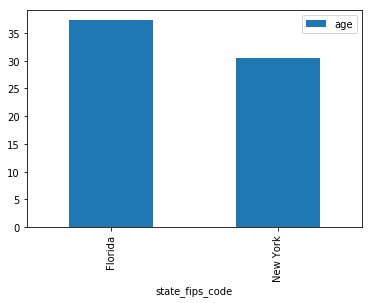

In [406]:
cen_c = cen[(cen['state_fips_code']=='Florida')|(cen['state_fips_code']=='New York')]

cen_c_plot = cen_c [['state_fips_code','age']].groupby('state_fips_code').mean()

cen_c_plot.plot(kind = 'bar')

Upon initial observation, Florida has a higher average age than New York residents. This could be skewed by the fact that Florida is often a place people retire in, which would affect the average age.

In [407]:
cen_c_ny = cen_c[(cen_c['state_fips_code']=='New York')]
cen_c_ny_age = cen_c_ny['age']
cen_c_ny_age

39    82
40    46
41    63
42    83
43    35
44     1
45     2
46    54
47    36
48    28
49     7
50    21
51     1
52    17
53    29
54    14
55    33
56    16
57    40
58    34
59     6
60    49
61    17
62    37
63     2
64    40
65    10
66    61
67    24
68    23
69    16
70    36
71     7
72    32
73    19
74    81
75    47
76    72
77     2
78    46
79    27
80     2
81    10
Name: age, dtype: int64

In [408]:
cen_c_fl = cen_c[(cen_c['state_fips_code']=='Florida')]
cen_c_fl_age = cen_c_fl['age']
cen_c_fl_age

0     44
1     20
2     20
3      6
4     55
5     43
6     60
7     47
8     54
9     58
10    33
11    51
12    62
13     8
14    25
15    44
16    28
17     1
18    31
19    69
20    31
21    80
22     2
23    47
24    12
25    47
26     8
27    67
28    17
29    69
30    55
31    18
32    66
33    58
34    21
35    52
36    18
37     2
38    26
Name: age, dtype: int64

In [409]:
cen_c = cen_c.dropna()

In [410]:
cen_c.describe()

,census_year,total_family_income,age,total_personal_income
count,60.0,60.000000,60.000000,60.000000
mean,2000.0,49585.166667,42.966667,24318.166667
std,0.0,36988.493240,19.060089,26945.495299
min,2000.0,0.000000,16.000000,0.000000
25%,2000.0,24500.000000,26.750000,5700.000000
50%,2000.0,45975.000000,43.500000,16550.000000
75%,2000.0,62840.000000,55.750000,34490.000000
max,2000.0,168200.000000,83.000000,123000.000000


In [411]:
cen_c_fl_age.describe()

count    39.000000
mean     37.307692
std      22.281871
min       1.000000
25%      19.000000
50%      43.000000
75%      55.000000
max      80.000000
Name: age, dtype: float64

In [412]:
cen_c_ny_age.describe()

count    43.000000
mean     30.418605
std      23.182745
min       1.000000
25%      12.000000
50%      28.000000
75%      43.000000
max      83.000000
Name: age, dtype: float64

In [413]:
cen_c.skew()

census_year              0.000000
total_family_income      1.220308
age                      0.372109
total_personal_income    2.136616
dtype: float64

Between Florida and New York, there are not a lot of data points, which will limit the accuracy of the conclusion. All data points are from the year 2000. Total family income and total personal income are skewed, which make sense because more people are likely to make a lower salary. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12f52b850>,
      dtype=object)

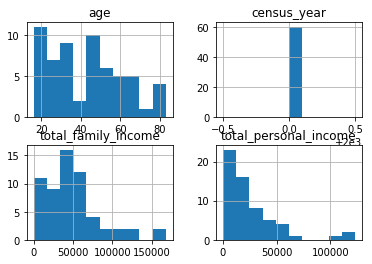

In [414]:
cen_c.hist()

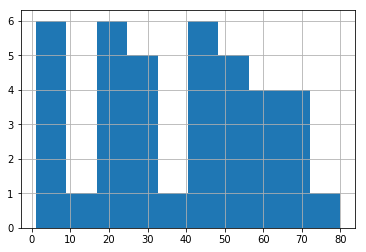

In [415]:
cen_c_fl_age.hist()

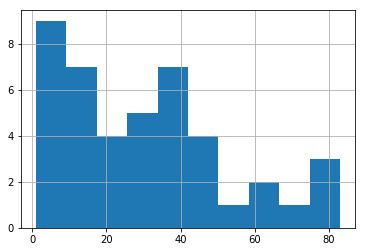

In [416]:
cen_c_ny_age.hist()

It appears as if there is not a very even sampling of age in the dataframe. This could leave out important data points that would contribute to the accuracy of the conclusion. The distributions of total family and personal income seem realistic in where they peak because total family income will have a higer mean and median value in comparison to total personal income. For this reason, only outliers pertaining to age will be addressed via the IQR method.

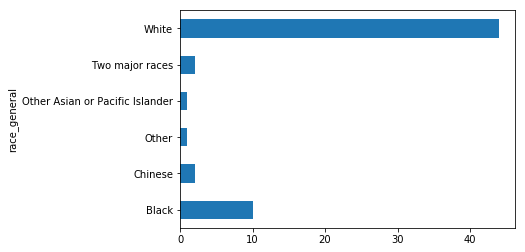

In [417]:
count_race = cen_c.groupby (['race_general']).size()
count_race
count_race.plot.barh()

Being that the majority of the surveyed are white, this will impact the conclusion because of lack of representation. 

#### Removing outliers of age in Florida via IQR method

In [418]:
age_fl = cen_c_fl['age']
age_fl_median = age_fl.median()
age_fl_iqr = age_fl.quantile(0.75) - age_fl.quantile(0.25)

print len(cen_c_fl[age_fl > age_fl_median+1.5*age_fl_iqr])
print len(cen_c_fl[age_fl < age_fl_median-1.5*age_fl_iqr])

fl_median_outlier_drop = cen_c_fl.drop(
    cen_c_fl.index[
        (age_fl > age_fl_median+1.5*age_fl_iqr) | (age_fl<age_fl_median-1.5*age_fl_iqr)
    ]
)

print age_fl_median - 1.5*age_fl_iqr
print age_fl_median + 1.5*age_fl_iqr

fl_median_outlier_drop.head()

0
0
-11.0
97.0


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
1,2000,Florida,22800.0,20,Female,White,Never married/single,13000.0
2,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
3,2000,Florida,23000.0,6,Female,White,Never married/single,NaN
4,2000,Florida,48000.0,55,Male,White,Married/spouse present,36000.0


#### Removing outliers of age in New York via IQR method

In [419]:
age_ny = cen_c_ny['age']
age_ny_median = age_ny.median()
age_ny_iqr = age_ny.quantile(0.75) - age_ny.quantile(0.25)

print len(cen_c_ny[age_ny > age_ny_median+1.5*age_ny_iqr])
print len(cen_c_ny[age_ny < age_ny_median-1.5*age_ny_iqr])

ny_median_outlier_drop = cen_c_ny.drop(
    cen_c_ny.index[
        (age_ny > age_ny_median+1.5*age_ny_iqr) | (age_ny<age_ny_median-1.5*age_ny_iqr)
    ]
)

print age_ny_median - 1.5*age_ny_iqr
print age_ny_median + 1.5*age_ny_iqr

ny_median_outlier_drop.head()

3
0
-18.5
74.5


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
40,2000,New York,0.0,46,Female,White,Divorced,17000.0
41,2000,New York,165000.0,63,Male,White,Married/spouse present,123000.0
43,2000,New York,48630.0,35,Female,White,Married/spouse present,15830.0
44,2000,New York,13000.0,1,Male,White,Never married/single,NaN
45,2000,New York,68020.0,2,Female,Chinese,Never married/single,NaN


In [420]:
print fl_median_outlier_drop.mean()
print ny_median_outlier_drop.mean()

census_year               2000.000000
total_family_income      46848.205128
age                         37.307692
total_personal_income    20436.562500
dtype: float64
census_year               2000.000000
total_family_income      59545.405405
age                         26.550000
total_personal_income    25991.071429
dtype: float64


After removing outliers, it appears as if New York has a higher average age than Florida. Thus, the data analysis was essential to getting a clearer picture to answer the question at hand. 

### Part (d)

Is the standard deviation of age in Florida different than that of New York?

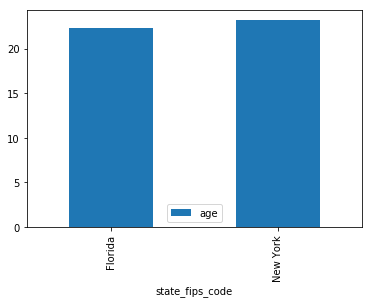

In [421]:
cen_d = cen[(cen['state_fips_code']=='Florida')|(cen['state_fips_code']=='New York')]

cen_d_plot = cen_d [['state_fips_code','age']].groupby('state_fips_code').std()

cen_d_plot.plot(kind = 'bar')

In [422]:
print cen_c_fl_age.std()

22.2818711372


In [423]:
print fl_median_outlier_drop.std()

census_year                  0.000000
total_family_income      31786.897240
age                         22.281871
total_personal_income    15563.922428
dtype: float64


In [424]:
print cen_c_ny_age.std()

23.1827445663


In [425]:
print ny_median_outlier_drop.std()

census_year                  0.000000
total_family_income      45327.587724
age                         18.939783
total_personal_income    36101.628704
dtype: float64


Without any manipulation of the data, it appears as if Florida has a slightly higher standard deviation of age than Florida. This is backed up my the previous removal of outliers via the IQR method. Further analysis will assess the accuracy of this.

In [426]:
cen_d = cen_d.dropna()

In [427]:
cen_d.describe()

,census_year,total_family_income,age,total_personal_income
count,60.0,60.000000,60.000000,60.000000
mean,2000.0,49585.166667,42.966667,24318.166667
std,0.0,36988.493240,19.060089,26945.495299
min,2000.0,0.000000,16.000000,0.000000
25%,2000.0,24500.000000,26.750000,5700.000000
50%,2000.0,45975.000000,43.500000,16550.000000
75%,2000.0,62840.000000,55.750000,34490.000000
max,2000.0,168200.000000,83.000000,123000.000000


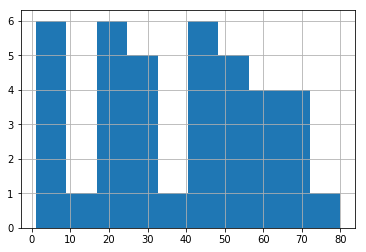

In [428]:
cen_c_fl_age.hist()

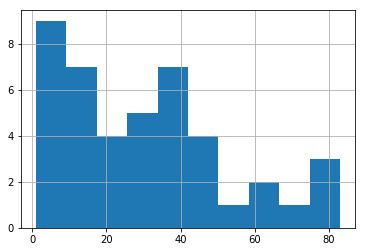

In [429]:
cen_c_ny_age.hist()

There appear to be outliers for age and while previous removal of outliers can confirm that Florida has a higher standard deviation in age than New York, the mean method of removing outliers will be done as well to strengthen the conclusion.

In [430]:
fl_age = cen_c_fl['age']
fl_age_mean = fl_age.mean()
fl_age_mean = fl_age.mean()
fl_age_std = fl_age.std()

fl_age_mean_outlier_drop = cen_c_fl.drop(
    cen_c_fl.index[
        (fl_age> fl_age_mean+5*fl_age_std) | (fl_age<fl_age_mean-5*fl_age_std)
    ]
)

print fl_age_mean - 5*fl_age_std
print fl_age_mean + 5*fl_age_std

fl_age_mean_outlier_drop.head()

-74.1016633785
148.717047994


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
0,2000,Florida,14550.0,44,Male,Two major races,Married/spouse present,0.0
1,2000,Florida,22800.0,20,Female,White,Never married/single,13000.0
2,2000,Florida,0.0,20,Male,Black,Never married/single,20000.0
3,2000,Florida,23000.0,6,Female,White,Never married/single,NaN
4,2000,Florida,48000.0,55,Male,White,Married/spouse present,36000.0


In [431]:
ny_age = cen_c_ny['age']
ny_age_mean = ny_age.mean()
ny_age_mean = ny_age.mean()
ny_age_std = ny_age.std()

ny_age_mean_outlier_drop = cen_c_ny.drop(
    cen_c_ny.index[
        (ny_age> ny_age_mean+5*ny_age_std) | (ny_age<ny_age_mean-5*ny_age_std)
    ]
)

print ny_age_mean - 5*ny_age_std
print ny_age_mean + 5*ny_age_std

ny_age_mean_outlier_drop.head()

-85.4951181803
146.332327483


,census_year,state_fips_code,total_family_income,age,sex,race_general,marital_status,total_personal_income
39,2000,New York,8800.0,82,Female,White,Widowed,8800.0
40,2000,New York,0.0,46,Female,White,Divorced,17000.0
41,2000,New York,165000.0,63,Male,White,Married/spouse present,123000.0
42,2000,New York,15570.0,83,Male,White,Widowed,15570.0
43,2000,New York,48630.0,35,Female,White,Married/spouse present,15830.0


In [432]:
fl_age_mean_outlier_drop.std()

census_year                  0.000000
total_family_income      31786.897240
age                         22.281871
total_personal_income    15563.922428
dtype: float64

In [433]:
ny_age_mean_outlier_drop.std()

census_year                  0.000000
total_family_income      44792.540627
age                         23.182745
total_personal_income    34849.883661
dtype: float64

Further analysis has backed up the conclusion that Flordia has a higher standard deviation of age than New York. 

# Task 3

See above for exploratory data analysis of each parts a, b, c and d.

# Task 4 and 5

Bootstrapping

## NOTE

Hi Professor Cicala, I was unable to interpret the error message I received in these parts, which I know will impact my ability to complete task 6. I've put all of the code down that I believe is right and am just unsure of what to do from here. I hope this is okay, I did not know what else to do. 

## Part a

In [436]:
def  median_bootstrap_a(california, texas , number_of_resamples):
    x = [0]* number_of_resamples
    for i in  range(number_of_resamples):
        resample = [california[j]
                    for j
                    in np.random.randint(len(california, texas), size=len(california, texas)
                    ]
        x[california.median() - texas.median()] = np.mean(resample)
        return x

SyntaxError: invalid syntax (<ipython-input-436-e0cd021bb489>, line 7)

In [438]:
m_a = mean_bootstrap_a(california, texas, 100)
plt.hist(m_a)
plt.show()

TypeError: 'DataFrame' object is not callable

## Part b

In [439]:
def  mean_bootstrap_b(cen_less_than, cen_greater_than , number_of_resamples):
    y = [0]* number_of_resamples
    for i in  range(number_of_resamples):
        resample = [cen[cen('total_family_income')]
                    for j
                    in np.random.randint(len(cen_less_than, cen_greater_than), size=len(cen_less_than, cen_greater_than)
                   ]
        x[p15 - p100] = np.mean(resample)
        return y

SyntaxError: invalid syntax (<ipython-input-439-d7edbe6a7118>, line 7)

In [440]:
m_b = mean_bootstrap_b(cen_less_than, cen_greater_than, 100)
plt.hist(m_b)
plt.show()

TypeError: 'DataFrame' object is not callable

## Part c

In [441]:
def  median_bootstrap_c(california, texas , number_of_resamples):
    z = [0]* number_of_resamples
    for i in  range(number_of_resamples):
        resample = [california[j]
                    for j
                    in np.random.randint(len(california, texas), size=len(california, texas)
                    ]
        x[california.mean() - texas.mean()] = np.mean(resample)
        return z

SyntaxError: invalid syntax (<ipython-input-441-aac3df64f396>, line 7)

In [442]:
m_c = mean_bootstrap_c(california, texas, 100)
plt.hist(m_c)
plt.show()

NameError: name 'mean_bootstrap_c' is not defined

## Part d

In [445]:
def  std_bootstrap_d(california, texas , number_of_resamples):
    s = [0]* number_of_resamples
    for i in  range(number_of_resamples):
        resample = [california[j]
                    for j
                    in np.random.randint(len(california, texas), size=len(california, texas)
                    ]
        x[california.std() - texas.std()] = np.mean(resample)
        return s

SyntaxError: invalid syntax (<ipython-input-445-aec2adaa7bf8>, line 7)

In [446]:
m_d = std_bootstrap_d(california, texas, 100)
plt.hist(m_d)
plt.show()

NameError: name 'std_bootstrap_d' is not defined

# Task 6

Because the previous code was not able to run, these cells will also not work as they are based off of the previous. Hence, the confidence intervals will not be explored. 

In [ ]:
ci_a = [np.percentile(m_a, 2.5) , np.percentile(m_a, 97.5)]
ci_a

In [ ]:
ci_b = [np.percentile(m_b, 2.5) , np.percentile(m_b, 97.5)]
ci_b

In [ ]:
ci_c = [np.percentile(m_c, 2.5) , np.percentile(m_c, 97.5)]
ci_c

In [ ]:
ci_d = [np.percentile(m_d, 2.5) , np.percentile(m_d, 97.5)]
ci_d